<h1>**K-Nearest Neighbours on German Credit Risk data set**</h1>

# Tables of Content:

**1. [Introduction](#Intro_knn)** <br>
    - Information about the data set <br>
**2. [Reason for using this model](#reasons_knn)** <br>
    - The purpose of this specific model <br>
**3. [Libraries](#libraries_knn)** <br>
    - Importing Libraries <br>
    - Importing Dataset <br>
**4. [Preprocess](#preprocessing_knn)** <br>
    - 4.1 Separating feature and target variables <br>
    - 4.2 [Feature Selection](#feature_selection_knn)<br>
    - 4.3 [Spliting the X and Y in train and test](#split_knn)<br>
**5. [Models](#modelling_knn)**<br>
    - 5.1 KNN with initial guesses<br>
    - 5.2 Iterating the model with different K values<br>
    - 5.3 Plotting F1 results vs. K<br>
    - 5.4 Plotting Error rate results vs. K<br>
    - 5.5 [KNN with best K](#best_knn)<br>
    - 5.6 [Metrics](#metrics_knn)<br>
    - 5.7 [Confusion Matrix and Classification Report](#conmat_knn)<br>
    - 5.8 ROC curve and Precision-Recall curve<br>
    
**6. [Conclusion and Benefits of the model](#summary_knn)** <br>
    The summary of the model implementation

<a id="Intro_knn"></a> <br>
# **1. Introduction:** 
<h2>Context</h2>
The original dataset contains 1000 entries with 9 feature variables. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

<h2>Content</h2>
I have cleaned and preprocessed the data already and also I have created a more relevant feature from two of the most important feature in the data set i.e. Credit amount and Duration. The preprocessed data set is already saved in a CSV file and we are going to use that file for our model training and testing purposes. The selected variables from the orginal data set are:

<b>Age</b> ################### (numeric)<br>
<b>Sex</b> ################### (text: male, female)<br>
<b>Job</b> ################### (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> ################ (text: own, rent, or free)<br>
<b>Saving accounts</b> ######## (text - little, moderate, quite rich, rich)<br>
<b>Checking account</b> ####### (numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> ########## (numeric, in DM)<br>
<b>Duration</b> ############### (numeric, in month)<br>
<b>Purpose</b> ################ (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> ################## (Value target - Good or Bad Risk)<br>

<a id="reasons_knn"></a> <br>
# **2. Reason for using this model**
<h2>Our goal is to: </h2>

- Implement KNN with initial guesses for no. of neighbours on German Credit Risk.
- Evaluate the optimum no. of neighbours which could be used for this data set.
- Assess the different metrics on the initial and optimum implementation and compare them.
- Evaluate False Positive Rate (FPR) on these models using Confusion Matrix.
- Visualize Receiver Operating Characteristics (ROC) curve and Precision-Recall curve to see the trend.

<a id="libraries_knn"></a> <br>
# **3. Libraries**

### Imports

In [3]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

from scipy import stats 
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from colorsetup import colors, palette

### Read the data

In [4]:
gcr_data = pd.read_csv("gcr_data_imputed2.csv")
#gcr_data = pd.read_csv("gcr_data_imputed.csv")
#gcr_data = pd.read_csv("gcr_processed.csv")

In [5]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0


In [6]:
gcr_data['Credit_amount/duration'] = gcr_data['Credit amount']/gcr_data['Duration']

In [7]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk,Credit_amount/duration
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1,3.630568
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0,2.233269
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1,2.981838
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1,2.385532
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0,2.637894


<a id="preprocessing-knn"></a> <br>
# **4. Preprocess**

<h2>4.1 Separating feature and target</h2>

In [8]:
#X = gcr_data.drop(['Risk','Credit_amount/duration'], axis=1)
X = gcr_data.drop(['Risk', 'Credit amount'], axis=1)
#X = gcr_data.drop(['Risk'], axis=1)

y = gcr_data['Risk']

<a id="feature_selection_knn"></a>
<h2>4.2 Feature Selection</h2>

### 1. Univariate Selection

In [9]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(14, 'Score'))  #print best features

                         Specs      Score
11     Checking account_little  33.595555
7       Saving accounts_little  10.291479
12   Checking account_moderate   7.248111
19            Purpose_radio/TV   5.707578
6                 Housing_rent   4.901023
10        Saving accounts_rich   4.853800
3                     Duration   4.699713
4                 Housing_free   4.113929
5                  Housing_own   3.604819
9   Saving accounts_quite rich   3.270982
22      Credit_amount/duration   2.664176
17           Purpose_education   1.572042
13       Checking account_rich   1.258393
1                          Sex   1.224608


In [10]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = KNeighborsClassifier(n_neighbors=5)

results = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[featureScores.nlargest(i, 'Score')['Specs']], y)
        results.append(scores)
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.701 (0.020)
> 2) 0.656 (0.075)
> 3) 0.658 (0.050)
> 4) 0.672 (0.045)
> 5) 0.693 (0.039)
> 6) 0.698 (0.041)
> 7) 0.714 (0.049)
> 8) 0.713 (0.041)
> 9) 0.710 (0.043)
> 10) 0.711 (0.046)
> 11) 0.711 (0.036)
> 12) 0.707 (0.033)
> 13) 0.707 (0.036)
> 14) 0.704 (0.042)
> 15) 0.700 (0.042)
> 16) 0.702 (0.039)
> 17) 0.699 (0.044)
> 18) 0.707 (0.043)
> 19) 0.706 (0.042)
> 20) 0.706 (0.039)
> 21) 0.700 (0.038)
> 22) 0.694 (0.040)
> 23) 0.692 (0.041)


In [8]:
#X = gcr_data[featureScores.nlargest(23, 'Score')['Specs'].values]

### 2. Feature Importance

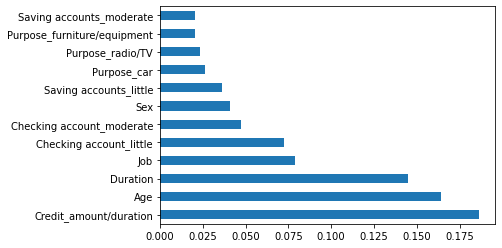

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

model_fi = ExtraTreesClassifier()
model_fi.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).nlargest(12).plot(kind='barh')
plt.show()

In [10]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = KNeighborsClassifier(n_neighbors=5)

results = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[feat_importances.nlargest(i).index], y)
        results.append(scores)
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.654 (0.036)
> 2) 0.656 (0.038)
> 3) 0.672 (0.030)
> 4) 0.677 (0.039)
> 5) 0.718 (0.033)
> 6) 0.729 (0.035)
> 7) 0.724 (0.028)
> 8) 0.721 (0.036)
> 9) 0.716 (0.034)
> 10) 0.723 (0.032)
> 11) 0.715 (0.034)
> 12) 0.714 (0.034)
> 13) 0.714 (0.037)
> 14) 0.707 (0.044)
> 15) 0.705 (0.040)
> 16) 0.699 (0.039)
> 17) 0.695 (0.039)
> 18) 0.697 (0.038)
> 19) 0.699 (0.038)
> 20) 0.694 (0.038)
> 21) 0.694 (0.039)
> 22) 0.694 (0.040)
> 23) 0.692 (0.041)


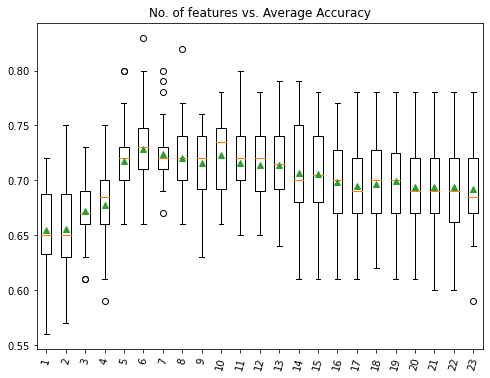

In [12]:
no_of_features = [str(i) for i in range(1,X.shape[1]+1)]
# plot model performance for comparison
plt.figure(figsize=(8,6))
plt.boxplot(results, labels=no_of_features, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

### 3. Correlation Matrix with Heatmap

<a id="split_knn"></a>
<h2>4.3 StratifiedShuffleSplit</h2>

In [88]:
X = gcr_data[feat_importances.nlargest(11).index]
#X.head()

In [89]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, gcr_data.Risk))

# Create the dataframes
X_train = X.loc[train_idx, X.columns]
y_train = gcr_data.loc[train_idx, 'Risk']

X_test  = X.loc[test_idx, X.columns]
y_test  = gcr_data.loc[test_idx, 'Risk']

In [90]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 11), (700,), (300, 11), (300,))

<a id="modelling_knn"></a> <br>
# **5. Models**

#### Suppressing any warnings

In [91]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

<h2>5.1 KNN with initial guesses</h2>

In [92]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import label_binarize

In [93]:
# Estimate KNN model and report outcomes
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3 = knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)

In [94]:
knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_5 = knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)

<h2>5.2 Iterating the model with different K values</h2>

In [95]:
max_k = 100
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

#f1_results.head()

<h2>5.3 Plotting F1 results vs. K</h2>

<Figure size 1800x1200 with 0 Axes>

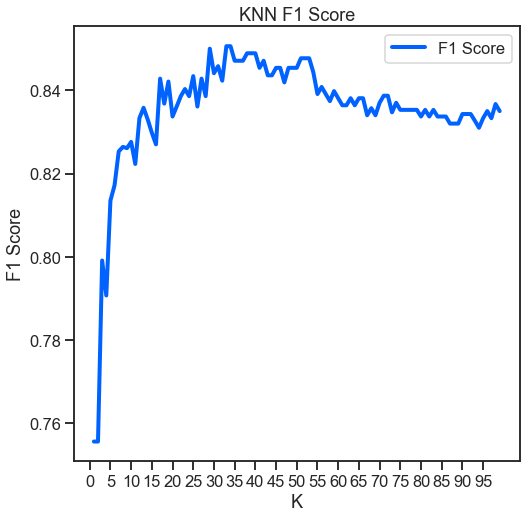

In [96]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color=colors[0], figsize=(8, 8), linewidth=4)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(0, max_k, 5));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<h2>5.4 Plotting Error rate results vs. K</h2>

<Figure size 1800x1200 with 0 Axes>

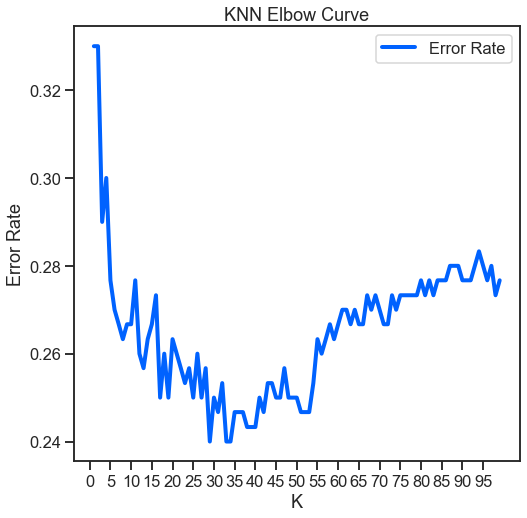

In [97]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(color=colors[0], figsize=(8, 8), linewidth=4)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(0, max_k, 5))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

<a id="best"></a>
<h2>5.5 KNN with best K</h2>

In [108]:
knn_best = KNeighborsClassifier(n_neighbors=33, weights='distance')
knn_best = knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

<a id="metrics_knn"></a>
<h2>5.6 Metrics</h2>

In [109]:
coeff_labels = ['KNN_3', 'KNN_5', 'KNN_best']
coeff_models = [knn_3, knn_5, knn_best]

y_pred = list()
y_prob = list()

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

,KNN_3,KNN_5,KNN_best
precision,0.691447,0.705303,0.774002
recall,0.706667,0.723333,0.760000
fscore,0.696398,0.708793,0.712385
accuracy,0.706667,0.723333,0.760000
auc,0.622222,0.630952,0.615873


<a id="conmat_knn"></a>
<h2>5.7 Confusion Matrix and Classification Report</h2>

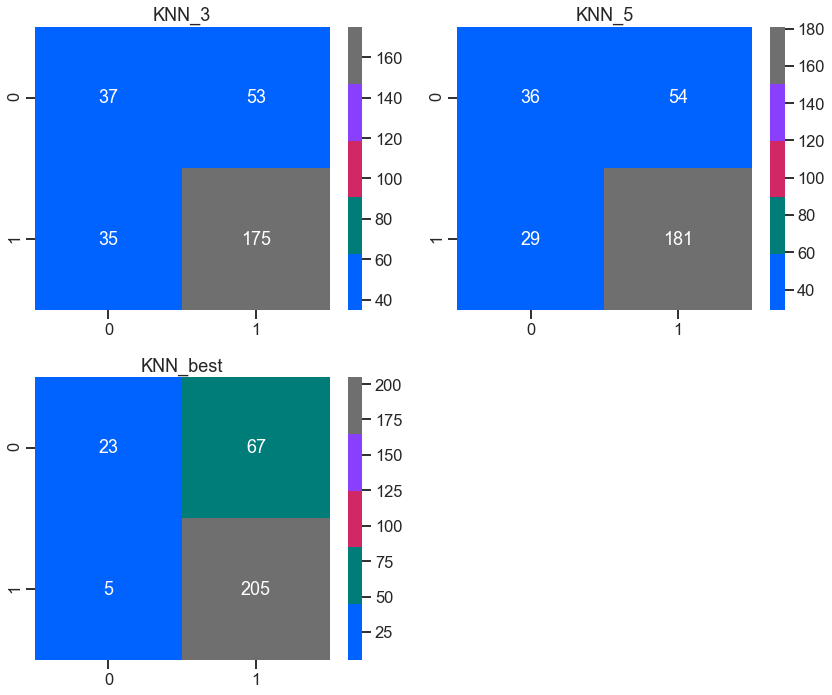

In [110]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()

In [112]:
y_pred_knn_3 = knn_3.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print('#'*60)
print('KNN_3\n')
print(classification_report(y_test, y_pred_knn_3))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_knn_3), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn_3), 3))

print('\n')
print('#'*60)

y_pred_knn_5 = knn_5.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print('KNN_5\n')
print(classification_report(y_test, y_pred_knn_5))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_knn_5), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn_5), 3))

print('\n')
print('#'*60)

y_pred_knn_best = knn_best.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print('KNN_Best\n')
print(classification_report(y_test, y_pred_knn_best))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_knn_best), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn_best), 3))

############################################################
KNN_3

              precision    recall  f1-score   support

           0       0.51      0.41      0.46        90
           1       0.77      0.83      0.80       210

    accuracy                           0.71       300
   macro avg       0.64      0.62      0.63       300
weighted avg       0.69      0.71      0.70       300

Accuracy score:  0.707
F1 Score:  0.799


############################################################
KNN_5

              precision    recall  f1-score   support

           0       0.55      0.40      0.46        90
           1       0.77      0.86      0.81       210

    accuracy                           0.72       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.71      0.72      0.71       300

Accuracy score:  0.723
F1 Score:  0.813


############################################################
KNN_Best

              precision    recall  f1-score   support



<h2>5.8 ROC curve and Precision-Recall curve</h2>

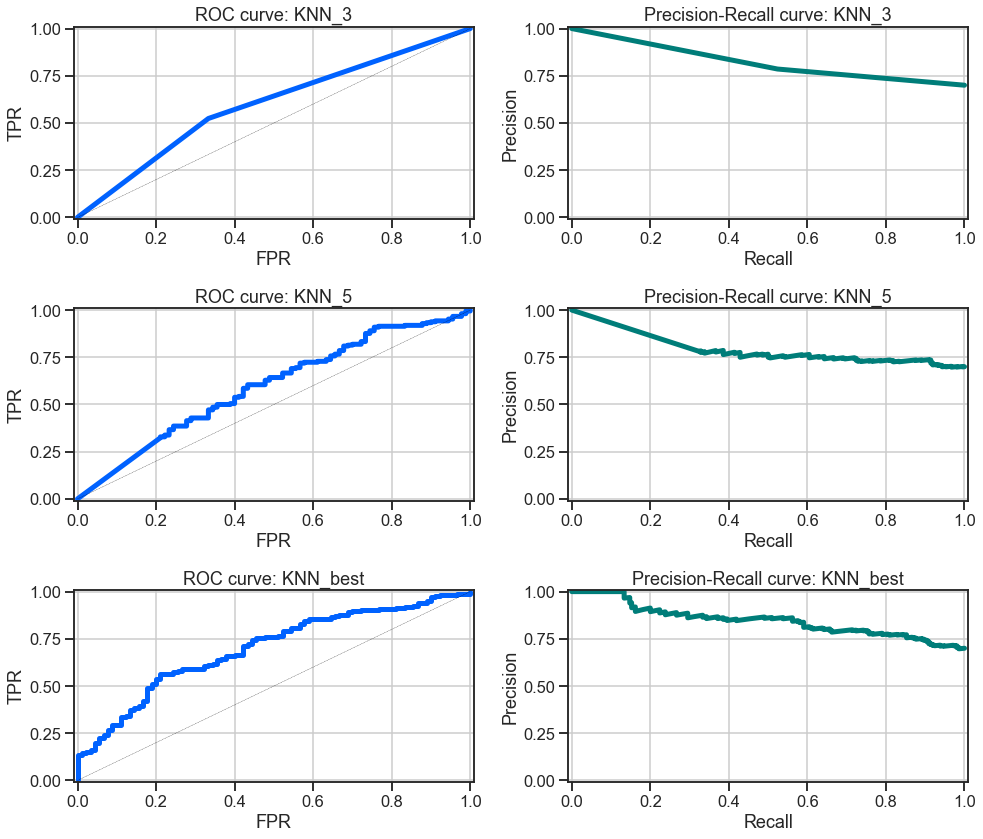

In [113]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')

fig, axList = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(14, 12)

for i, lab in zip(range(3),coeff_labels):

    # Plot the ROC-AUC curve

    ax = axList[i][0]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[lab])
    ax.plot(fpr, tpr, color=colors[0], linewidth=5)

    # It is customary to draw a diagonal dotted line in ROC plots.
    # This is to indicate completely random prediction. Deviation from this
    # dotted line towards the upper left corner signifies the power of the model.
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='FPR',
           ylabel='TPR',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='ROC curve: {}'.format(lab))
    ax.grid(True)

    # Plot the precision-recall curve

    ax = axList[i][1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob[lab])
    ax.plot(recall, precision, color=colors[1], linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='Precision-Recall curve: {}'.format(lab))
    ax.grid(True)

plt.tight_layout()

<a id="summary_knn"></a> <br>
# **6. Conclusion and Benefits of the model**
- KNN performs comparably better when number of features are set to 11.
- KNN with number of neighbours equal to 38 gives a best result for this data set. The accuracy comes to 76% and FPR reduces to 18%.
- KNN gives the least FPR among other models and is computationally faster.
- Polynomial Features i.e. (Credit_amount_duration) helped us to improve the metrics on this dataset for all implementations.

#########################################################################################################################################